In [1]:
import xml.etree.ElementTree as ET


def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text) #bottom
        xmin = int(boxes.find("bndbox/xmin").text) #left
        ymax = int(boxes.find("bndbox/ymax").text) #top
        xmax = int(boxes.find("bndbox/xmax").text) #right

        list_with_single_boxes = [xmin, ymin, xmax, ymax] #[left,bottom,right,top]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes



In [2]:
from keras_applications.vgg16 import preprocess_input
from keras_preprocessing.image import load_img, img_to_array
import xml.etree.ElementTree as ET


def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text) #bottom
        xmin = int(boxes.find("bndbox/xmin").text) #left
        ymax = int(boxes.find("bndbox/ymax").text) #top
        xmax = int(boxes.find("bndbox/xmax").text) #right

        list_with_single_boxes = [xmin, ymin, xmax, ymax] #[left,bottom,right,top]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes
#H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02883205/n02883205_10388.JPEG
#
def decile (name,pred):
    #d = image.flatten()
    # model_input - is an input layer
    #name_dir = name.split('_')[0]
    
    #path = 'H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/n02104029'
    n, boxes = read_content('H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/n02104029/'+name+'.xml')
    #for filename in os.listdir(path):
        
    source_img = load_img(f'H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02104029/'+n+'.JPEG', target_size=input_shape)
    
    img = img_to_array(source_img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img, backend=keras.backend)
    im_name = scoreCAM.prepare_cam(img)
    heatmap = scoreCAM.get_class_heatmap(222)
        #for basename in img_basenames:
            #f_name, f_ext = os.path.splitext(basename)
            #f_name = f_name.split('.')[0]
        #if not boxes.empty:
            
            #sorted_df = df2.sort_values(by='filename', ascending=True)
            # = sorted_df.loc[sorted_df['filename'] == name].values.tolist()
    
    xmin = boxes[0][0]
    ymin = boxes[0][1]
    xmax=boxes[0][2]
    ymax =boxes[0][3]
            #n = B[0][1]
                
            #im = cv2.imread(f'H:/Juston_Charlotte/ScoreCAM_resultats/heatmaps/n02098105'+f_name+'.png')
    im1 = heatmap[ymin:ymax, xmin:xmax]
        #cv2.imwrite(f'R:/Bureau/n03297495_ScoreCAM/annot/'+n+'_crop.JPEG', im1)
        #ima = cv2.imread(f'R:/Bureau/n03297495_ScoreCAM/annot/'+n+'_crop.JPEG')
    perc = np.percentile(im1, 90)
        
    return perc

In [30]:
def decile_modified (inp,label_true):
    path_inp = inp.replace('.JPEG', '')
    n, boxes = read_content(path+'.xml')
    #for filename in os.listdir(path):
        
    source_img = load_img(inp, target_size=input_shape)
    
    img = img_to_array(source_img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img, backend=keras.backend)
    im_name = scoreCAM.prepare_cam(img)
    heatmap = scoreCAM.get_class_heatmap(222)
        #for basename in img_basenames:
            #f_name, f_ext = os.path.splitext(basename)
            #f_name = f_name.split('.')[0]
        #if not boxes.empty:
            
            #sorted_df = df2.sort_values(by='filename', ascending=True)
            # = sorted_df.loc[sorted_df['filename'] == name].values.tolist()
    
    xmin = boxes[0][0]
    ymin = boxes[0][1]
    xmax=boxes[0][2]
    ymax =boxes[0][3]
            #n = B[0][1]
                
            #im = cv2.imread(f'H:/Juston_Charlotte/ScoreCAM_resultats/heatmaps/n02098105'+f_name+'.png')
    im1 = heatmap[ymin:ymax, xmin:xmax]
        #cv2.imwrite(f'R:/Bureau/n03297495_ScoreCAM/annot/'+n+'_crop.JPEG', im1)
        #ima = cv2.imread(f'R:/Bureau/n03297495_ScoreCAM/annot/'+n+'_crop.JPEG')
    perc = np.percentile(im1, 90)
        
    return perc

In [95]:
import xml.etree.ElementTree as ET
import os
import pandas as pd
path = 'H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/n04584207'
data=[]
for filename in os.listdir(path):
    name, boxes = read_content("H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/n04584207/"+filename)
    left = boxes[0][0]
    bottom = boxes[0][1]
    right = boxes[0][2]
    top = boxes[0][3]
    name = name+'.JPEG'
    d = {'filename': name, 'bbox': boxes, 'xmin':left,'ymin':bottom,'xmax':right,'ymax':top}
    df = pd.DataFrame(data=d)
    data.append(d)
    df2 = df.append(data, True)

In [96]:

df= df2.drop('bbox',axis=1)

In [97]:
df

,filename,xmin,ymin,xmax,ymax
0,n04584207_7454.JPEG,211,6,326,176
1,n04584207_7454.JPEG,211,6,326,176
2,n04584207_7454.JPEG,211,6,326,176
3,n04584207_14749.JPEG,130,0,468,270
4,n04584207_3940.JPEG,70,2,200,140
...,...,...,...,...,...
495,n04584207_27495.JPEG,0,2,498,331
496,n04584207_5362.JPEG,101,107,251,211
497,n04584207_25871.JPEG,217,113,273,223
498,n04584207_22626.JPEG,79,6,414,374


In [98]:
df.to_csv(r'D:/Users/aalah_le/Documents/dataset/results/others/n04584207.csv',index = False, header = True)

In [106]:
# import the necessary packages
import os
# define the base path to the input dataset and then use it to derive
# the path to the images directory and annotation CSV file
BASE_PATH = "D:/Users/aalah_le/Documents/dataset/results/"
IMAGES_PATH = os.path.sep.join([BASE_PATH, "n04584207"])
ANNOTS_PATH = os.path.sep.join([BASE_PATH, "n04584207.csv"])

In [107]:
# define the path to the base output directory
BASE_OUTPUT = "D:/Users/aalah_le/Documents/dataset/results/others/"
# define the path to the output serialized model, model training plot,
# and testing image filenames
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
TEST_FILENAMES = os.path.sep.join([BASE_OUTPUT, "test_images.txt"])

In [108]:
# initialize our initial learning rate, number of epochs to train
# for, and the batch size
INIT_LR = 1e-4
NUM_EPOCHS = 25
BATCH_SIZE = 32

In [109]:
# import the necessary packages
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [110]:
# load the contents of the CSV annotations file
print("[INFO] loading dataset...")
rows = open(ANNOTS_PATH).read().strip().split("\n")
# initialize the list of data (images), our target output predictions
# (bounding box coordinates), along with the filenames of the
# individual images
data = []
targets = []
filenames = []

[INFO] loading dataset...


In [111]:
# loop over the rows
for row in rows:
    # break the row into the filename and bounding box coordinates
    row = row.split(",")
    (filename, startX, startY, endX, endY) = row
    # derive the path to the input image, load the image (in OpenCV
    # format), and grab its dimensions
    imagePath = os.path.sep.join([IMAGES_PATH, filename])
    if(os.path.exists(imagePath)):
        image = cv2.imread(imagePath)
        (h, w) = image.shape[:2]
    # scale the bounding box coordinates relative to the spatial
    # dimensions of the input image
        startX = float(startX) / w
        startY = float(startY) / h
        endX = float(endX) / w
        endY = float(endY) / h
    # load the image and preprocess it
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
    # update our list of data, targets, and filenames
        data.append(image)
        targets.append((startX, startY, endX, endY))
        filenames.append(filename)

In [112]:
# convert the data and targets to NumPy arrays, scaling the input
# pixel intensities from the range [0, 255] to [0, 1]
data = np.array(data, dtype="float32") / 255.0
targets = np.array(targets, dtype="float32")
# partition the data into training and testing splits using 90% of
# the data for training and the remaining 10% for testing
split = train_test_split(data, targets, filenames, test_size=0.10,
    random_state=42)
# unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]
# write the testing filenames to disk so that we can use then
# when evaluating/testing our bounding box regressor
print("[INFO] saving testing filenames...")
f = open(TEST_FILENAMES, "w")
f.write("\n".join(testFilenames))
f.close()

[INFO] saving testing filenames...


In [113]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)
# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid")(bboxHead)
# construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bboxHead)

In [115]:
# initialize the optimizer, compile the model, and show the model
# summary
import keras
opt = Adam(lr=INIT_LR)
#model.compile(loss="mse", optimizer=opt)
loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#model.compile(loss="categorical_crossentropy", optimizer=opt, metrics = ['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])
print(model.summary())
# train the network for bounding box regression
print("[INFO] training bounding box regressor...")
H = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

[INFO] saving object detector model...


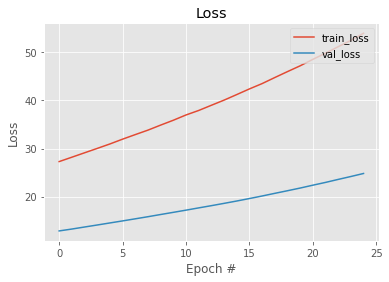

In [116]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


[INFO] saving object detector model...


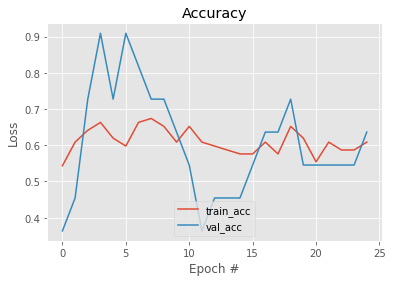

In [117]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower center")


# bowtie

In [62]:
# import the necessary packages
import os
# define the base path to the input dataset and then use it to derive
# the path to the images directory and annotation CSV file
BASE_PATH = "D:/Users/aalah_le/Documents/dataset/images"
IMAGES_PATH = os.path.sep.join([BASE_PATH, "bowtie"])
ANNOTS_PATH = os.path.sep.join([BASE_PATH, "bowtie.csv"])

In [63]:
# define the path to the base output directory
BASE_OUTPUT = "D:/Users/aalah_le/Documents/dataset/output/two"
# define the path to the output serialized model, model training plot,
# and testing image filenames
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
TEST_FILENAMES = os.path.sep.join([BASE_OUTPUT, "test_images.txt"])

In [64]:
# initialize our initial learning rate, number of epochs to train
# for, and the batch size
INIT_LR = 1e-4
NUM_EPOCHS = 25
BATCH_SIZE = 32

In [65]:
# import the necessary packages
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [66]:
# load the contents of the CSV annotations file
print("[INFO] loading dataset...")
rows = open(ANNOTS_PATH).read().strip().split("\n")
# initialize the list of data (images), our target output predictions
# (bounding box coordinates), along with the filenames of the
# individual images
data = []
targets = []
filenames = []

[INFO] loading dataset...


In [67]:
# loop over the rows
for row in rows:
    # break the row into the filename and bounding box coordinates
    row = row.split(",")
    (filename, startX, startY, endX, endY) = row
    # derive the path to the input image, load the image (in OpenCV
    # format), and grab its dimensions
    imagePath = os.path.sep.join([IMAGES_PATH, filename])
    if(os.path.exists(imagePath)):
        image = cv2.imread(imagePath)
        (h, w) = image.shape[:2]
    # scale the bounding box coordinates relative to the spatial
    # dimensions of the input image
        startX = float(startX) / w
        startY = float(startY) / h
        endX = float(endX) / w
        endY = float(endY) / h
    # load the image and preprocess it
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
    # update our list of data, targets, and filenames
        data.append(image)
        targets.append((startX, startY, endX, endY))
        filenames.append(filename)

In [68]:
# convert the data and targets to NumPy arrays, scaling the input
# pixel intensities from the range [0, 255] to [0, 1]
data = np.array(data, dtype="float32") / 255.0
targets = np.array(targets, dtype="float32")
# partition the data into training and testing splits using 90% of
# the data for training and the remaining 10% for testing
split = train_test_split(data, targets, filenames, test_size=0.10,
    random_state=42)
# unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]
# write the testing filenames to disk so that we can use then
# when evaluating/testing our bounding box regressor
print("[INFO] saving testing filenames...")
f = open(TEST_FILENAMES, "w")
f.write("\n".join(testFilenames))
f.close()

[INFO] saving testing filenames...


In [69]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)
# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid")(bboxHead)
# construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bboxHead)

In [70]:
# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(lr=INIT_LR)
model.compile(loss="mse", optimizer=opt)
print(model.summary())
# train the network for bounding 
box regression
print("[INFO] training bounding box regressor...")
H = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

[INFO] saving object detector model...


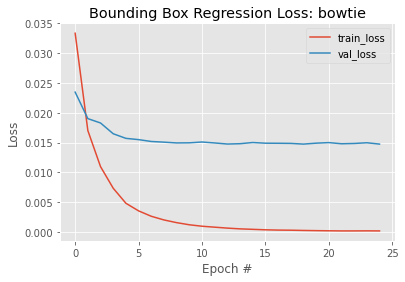

In [71]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss: bowtie")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


In [72]:
# import the necessary packages

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

In [90]:

filenames = open(TEST_FILENAMES).read().strip().split("\n")
imagePaths = []
    # loop over the filenames
for f in filenames:
    # construct the full path to the image filename and then
    # update our image paths list
    p = "D:/Users/aalah_le/Documents/dataset/images/bowtie/"+f
    imagePaths.append(p)

In [89]:
filenames

['n02883205_49319.JPEG',
 'n02883205_2100.JPEG',
 'n02883205_48233.JPEG',
 'n02883205_14316.JPEG',
 'n02883205_23099.JPEG',
 'n02883205_20083.JPEG',
 'n02883205_3251.JPEG',
 'n02883205_2491.JPEG',
 'n02883205_40402.JPEG',
 'n02883205_38600.JPEG',
 'n02883205_5134.JPEG',
 'n02883205_30240.JPEG',
 'n02883205_46036.JPEG',
 'n02883205_24217.JPEG',
 'n02883205_26799.JPEG',
 'n02883205_3166.JPEG',
 'n02883205_42143.JPEG',
 'n02883205_43657.JPEG',
 'n02883205_44395.JPEG',
 'n02883205_26196.JPEG',
 'n02883205_28133.JPEG',
 'n02883205_13989.JPEG',
 'n02883205_29724.JPEG',
 'n02883205_46387.JPEG',
 'n02883205_21753.JPEG',
 'n02883205_10657.JPEG',
 'n02883205_27455.JPEG',
 'n02883205_15589.JPEG',
 'n02883205_2762.JPEG',
 'n02883205_43183.JPEG',
 'n02883205_46660.JPEG',
 'n02883205_18366.JPEG',
 'n02883205_63218.JPEG',
 'n02883205_9350.JPEG',
 'n02883205_24774.JPEG',
 'n02883205_5585.JPEG',
 'n02883205_27956.JPEG',
 'n02883205_33.JPEG',
 'n02883205_4376.JPEG',
 'n02883205_19153.JPEG',
 'n02883205_

In [91]:
imagePaths

['D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_49319.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_2100.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_48233.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_14316.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_23099.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_20083.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_3251.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_2491.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_40402.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_38600.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_5134.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_30240.JPEG',
 'D:/Users/aalah_le/Documents/dataset/images/bowtie/n02883205_46036.JPEG',
 'D:/Users/aalah_le/Documents

In [93]:
# load our trained bounding box regressor from disk
print("[INFO] loading object detector...")
model = load_model(MODEL_PATH)
# loop over the images that we'll be testing using our bounding box
# regression model

for imagePath in imagePaths:
    if(os.path.exists(imagePath)):
    # load the input image (in Keras format) from disk and preprocess
    # it, scaling the pixel intensities to the range [0, 1]
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image) / 255.0
        image = np.expand_dims(image, axis=0)
    # make bounding box predictions on the input image
        preds = model.predict(image)[0]
        (startX, startY, endX, endY) = preds
    # load the input image (in OpenCV format), resize it such that it
    # fits on our screen, and grab its dimensions
        image = cv2.imread(imagePath)
        image = imutils.resize(image, width=600)
        (h, w) = image.shape[:2]
    # scale the predicted bounding box coordinates based on the image
    # dimensions
        startX = int(startX * w)
        startY = int(startY * h)
        endX = int(endX * w)
        endY = int(endY * h)
    # draw the predicted bounding box on the image
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)
    # show the output image
    cv2.imshow("Output", image)
    cv2.waitKey(0)

[INFO] loading object detector...


In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def ScoreCam(model, img_array, layer_name, max_N=-1):

    cls = np.argmax(model.predict(img_array))
    act_map_array = Model(inputs=model.input, outputs=model.get_layer(layer_name).output).predict(img_array)
    
    # extract effective maps
    if max_N != -1:
        act_map_std_list = [np.std(act_map_array[0,:,:,k]) for k in range(act_map_array.shape[3])]
        unsorted_max_indices = np.argpartition(-np.array(act_map_std_list), max_N)[:max_N]
        max_N_indices = unsorted_max_indices[np.argsort(-np.array(act_map_std_list)[unsorted_max_indices])]
        act_map_array = act_map_array[:,:,:,max_N_indices]

    input_shape = model.layers[0].output_shape[0][1:]  # get input shape
    # 1. upsample to original input size
    #INTER_LINEAR : a bilinear interpolation (used by default)
    act_map_resized_list = [cv2.resize(act_map_array[0,:,:,k], input_shape[:2], interpolation=cv2.INTER_LINEAR) for k in range(act_map_array.shape[3])]
    # 2. normalize the raw activation value in each activation map into [0, 1]
    act_map_normalized_list = []
    for act_map_resized in act_map_resized_list:
        if np.max(act_map_resized) - np.min(act_map_resized) != 0:
            act_map_normalized = act_map_resized / (np.max(act_map_resized) - np.min(act_map_resized))
        else:
            act_map_normalized = act_map_resized
        act_map_normalized_list.append(act_map_normalized)
    # 3. project highlighted area in the activation map to original input space by multiplying the normalized activation map
    masked_input_list = []
    for act_map_normalized in act_map_normalized_list:
        masked_input = np.copy(img_array)
        for k in range(3):
            masked_input[0,:,:,k] *= act_map_normalized
        masked_input_list.append(masked_input)
    masked_input_array = np.concatenate(masked_input_list, axis=0)
    # 4. feed masked inputs into CNN model and softmax
    pred_from_masked_input_array = softmax(model.predict(masked_input_array))
    # 5. define weight as the score of target class
    weights = pred_from_masked_input_array[:,cls]
    # 6. get final class discriminative localization map as linear weighted combination of all activation maps
    cam = np.dot(act_map_array[0,:,:,:], weights)
    cam = np.maximum(0, cam)  # Passing through ReLU
    cam /= np.max(cam)  # scale 0 to 1.0
    
    return cam

def read_and_preprocess_img(path, size=(224,224)):
    img = load_img(path, target_size=size)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
def superimpose(original_img_path, cam, emphasize=False):
    
    img_bgr = cv2.imread(original_img_path)

    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, 0.5, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    #fin = cv2.addWeighted(heatmap_img, 0.7, img, 0.3, 0)
    
    return superimposed_img_rgb
def softmax(x):
    f = np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims = True)
    return f

KeyboardInterrupt: 

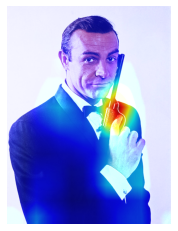

In [47]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import load_model

import matplotlib.pyplot as plt
import os
#os.chdir("R:/Bureau")
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

#from gradcamutils import GradCam, GradCamPlusPlus, ScoreCam, build_guided_model, GuidedBackPropagation, superimpose, read_and_preprocess_img

#model = VGG16(include_top=True, weights='imagenet')
model = load_model('D:/Users/aalah_le/Documents/dataset/output/two/detector.h5')

layer_name = 'block5_conv3'
#loop for a directory containing at least 1000 images from each class of the imagenet dataset

# choices to add dependending on which dataset
for basename in img_basenames:
    img_path = f'H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02883205/{basename}'
    orig_img = np.array(load_img(img_path),dtype=np.uint8)
    img_array = read_and_preprocess_img(img_path, size=(224,224))

    #predictions = model.predict(img_array)
    #top = decode_predictions(predictions, top=5)[0]

    

    score_cam=ScoreCam(model,img_array,layer_name)
    score_cam_superimposed = superimpose(img_path, score_cam)

    #superimposed cam is scaled from 0 to 255
    plt.imshow(score_cam_superimposed)
    plt.axis('off')
    plt.savefig(f"D:/Users/aalah_le/Documents/dataset/images/n02883205_ScoreCAM/result_{basename}")
    

In [48]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [49]:
import os
img_basenames = []
for file in os.listdir("D:/Users/aalah_le/Documents/dataset/images/n02883205_ScoreCAM"):
    if file.endswith(".JPEG"):
        img_basenames.append(file)

In [52]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import os
#os.chdir("R:/Bureau")
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
for basename in img_basenames:
    
    img_path = f'D:/Users/aalah_le/Documents/dataset/images/n02883205_ScoreCAM/{basename}'
    im = Image.open(img_path)
    im = trim(im)
    im.save(f'D:/Users/aalah_le/Documents/dataset/images/n02883205_ScoreCAM/{basename}')

In [1]:
import os
img_basenames = []
for file in os.listdir("H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02883205"):
    if file.endswith(".JPEG"):
        #print(file)
        img_basenames.append(file)

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import load_model
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

#from gradcamutils import GradCam, GradCamPlusPlus, ScoreCam, build_guided_model, GuidedBackPropagation, superimpose, read_and_preprocess_img

#model = VGG16(include_top=True, weights='imagenet')

model = load_model('D:/Users/aalah_le/Documents/dataset/output/two/detector.h5')
layer_name = 'block5_conv3'
#loop for a directory containing at least 1000 images from each class of the imagenet dataset
top_pred_two= []
# choices to add dependending on which dataset
for basename in img_basenames:
    img_path = f'H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02883205/{basename}'
    orig_img = np.array(load_img(img_path),dtype=np.uint8)
    img_array = read_and_preprocess_img(img_path, size=(224,224))

    predictions = model.predict(img_array)
    top = decode_predictions(predictions, top=5)[0]

    
    top_pred.append(top)
    #print(top)
    
    

In [45]:
#new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [20]:
top_pred

[[('n02883205', 'bow_tie', 0.9828268),
  ('n04584207', 'wig', 0.0035234177),
  ('n04350905', 'suit', 0.0015010592),
  ('n04591157', 'Windsor_tie', 0.0014686396),
  ('n04532106', 'vestment', 0.0010133077)],
 [('n02883205', 'bow_tie', 0.9451385),
  ('n04591157', 'Windsor_tie', 0.0042578974),
  ('n04350905', 'suit', 0.0037552062),
  ('n02869837', 'bonnet', 0.0029897331),
  ('n02834397', 'bib', 0.002550976)],
 [('n02883205', 'bow_tie', 0.345683),
  ('n03877472', 'pajama', 0.18487029),
  ('n02730930', 'apron', 0.12794726),
  ('n03594734', 'jean', 0.07918338),
  ('n04350905', 'suit', 0.04764635)],
 [('n02883205', 'bow_tie', 0.9406421),
  ('n04350905', 'suit', 0.015632736),
  ('n03787032', 'mortarboard', 0.0040448233),
  ('n04591157', 'Windsor_tie', 0.003977562),
  ('n02669723', 'academic_gown', 0.0025216339)],
 [('n02883205', 'bow_tie', 0.93415135),
  ('n02769748', 'backpack', 0.007954318),
  ('n02869837', 'bonnet', 0.006634784),
  ('n03709823', 'mailbag', 0.0057204086),
  ('n04026417', 'pur

In [26]:
df3 = pd.DataFrame(top_pred)
df3

,0,1,2,3,4
0,"(n02883205, bow_tie, 0.9828268)","(n04584207, wig, 0.0035234177)","(n04350905, suit, 0.0015010592)","(n04591157, Windsor_tie, 0.0014686396)","(n04532106, vestment, 0.0010133077)"
1,"(n02883205, bow_tie, 0.9451385)","(n04591157, Windsor_tie, 0.0042578974)","(n04350905, suit, 0.0037552062)","(n02869837, bonnet, 0.0029897331)","(n02834397, bib, 0.002550976)"
2,"(n02883205, bow_tie, 0.345683)","(n03877472, pajama, 0.18487029)","(n02730930, apron, 0.12794726)","(n03594734, jean, 0.07918338)","(n04350905, suit, 0.04764635)"
3,"(n02883205, bow_tie, 0.9406421)","(n04350905, suit, 0.015632736)","(n03787032, mortarboard, 0.0040448233)","(n04591157, Windsor_tie, 0.003977562)","(n02669723, academic_gown, 0.0025216339)"
4,"(n02883205, bow_tie, 0.93415135)","(n02769748, backpack, 0.007954318)","(n02869837, bonnet, 0.006634784)","(n03709823, mailbag, 0.0057204086)","(n04026417, purse, 0.0055230004)"
...,...,...,...,...,...
1295,"(n02883205, bow_tie, 0.10146547)","(n03124170, cowboy_hat, 0.05473036)","(n04355933, sunglass, 0.050598096)","(n09835506, ballplayer, 0.048850793)","(n03763968, military_uniform, 0.046170507)"
1296,"(n02808440, bathtub, 0.5943212)","(n04493381, tub, 0.19967407)","(n02883205, bow_tie, 0.05703424)","(n03125729, cradle, 0.021857798)","(n02808304, bath_towel, 0.013240834)"
1297,"(n02883205, bow_tie, 0.9967739)","(n04591157, Windsor_tie, 0.0027435839)","(n04350905, suit, 0.00013615994)","(n03630383, lab_coat, 0.00012376867)","(n04532106, vestment, 7.662007e-05)"
1298,"(n02883205, bow_tie, 0.99295783)","(n04591157, Windsor_tie, 0.0027339822)","(n04162706, seat_belt, 0.0020428053)","(n04350905, suit, 0.0003577081)","(n02869837, bonnet, 0.00013888624)"


In [27]:
df3.to_csv('D:/Users/aalah_le/Documents/dataset/images/predictions.csv',index=False)

In [28]:
for basename in img_basenames:
    print(basename)

n02883205_20230.JPEG
n02883205_19962.JPEG
n02883205_4235.JPEG
n02883205_25340.JPEG
n02883205_23381.JPEG
n02883205_24068.JPEG
n02883205_6976.JPEG
n02883205_25503.JPEG
n02883205_2172.JPEG
n02883205_18496.JPEG
n02883205_40455.JPEG
n02883205_46454.JPEG
n02883205_25780.JPEG
n02883205_2965.JPEG
n02883205_14629.JPEG
n02883205_16105.JPEG
n02883205_1274.JPEG
n02883205_1072.JPEG
n02883205_27505.JPEG
n02883205_31379.JPEG
n02883205_3179.JPEG
n02883205_11612.JPEG
n02883205_25323.JPEG
n02883205_1170.JPEG
n02883205_25226.JPEG
n02883205_24086.JPEG
n02883205_23066.JPEG
n02883205_31993.JPEG
n02883205_14962.JPEG
n02883205_3928.JPEG
n02883205_19903.JPEG
n02883205_12490.JPEG
n02883205_60864.JPEG
n02883205_15174.JPEG
n02883205_14659.JPEG
n02883205_21427.JPEG
n02883205_10912.JPEG
n02883205_13768.JPEG
n02883205_22353.JPEG
n02883205_366.JPEG
n02883205_14084.JPEG
n02883205_12120.JPEG
n02883205_21711.JPEG
n02883205_26127.JPEG
n02883205_25574.JPEG
n02883205_14158.JPEG
n02883205_3080.JPEG
n02883205_18780.JPEG
n028

In [33]:
import numpy as np
dff = pd.DataFrame([img_basenames, top_pred], sep = '\n')

TypeError: __init__() got an unexpected keyword argument 'sep'

In [34]:
lists = [img_basenames, top_pred]
dff = pd.concat([pd.Series(x) for x in lists], axis=1)

In [41]:
dff[1][0]

[('n02883205', 'bow_tie', 0.9828268),
 ('n04584207', 'wig', 0.0035234177),
 ('n04350905', 'suit', 0.0015010592),
 ('n04591157', 'Windsor_tie', 0.0014686396),
 ('n04532106', 'vestment', 0.0010133077)]

In [43]:
dff.to_csv('D:/Users/aalah_le/Documents/dataset/images/lists.csv',index=False)

In [27]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
from tensorflow import keras

In [28]:
# wrapper function that accepts the hyperparameter
def loss_with_threshold(threshold):
  
    # function that accepts the ground truth and predictions
    def decile_loss(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = threshold * (tf.abs(error) - (0.5 * threshold))
        
        return tf.where(is_small_error, small_error_loss, big_error_loss) 

    # return the inner function tuned by the hyperparameter
    return decile_loss

In [33]:
model_new = model
model_new.compile(optimizer='Adam', loss=loss_with_threshold(threshold=1.2), metrics = ['accuracy'])
model_new.fit(trainImages, trainTargets,
    validation_data=(testImages, testTargets), epochs=25,verbose=1)

Epoch 1/25
4/4 [==============================] - 33s 7s/step - loss: 0.0182 - accuracy: 0.4990 - val_loss: 0.0171 - val_accuracy: 0.3333
Epoch 2/25
4/4 [==============================] - 31s 7s/step - loss: 0.0145 - accuracy: 0.3103 - val_loss: 0.0204 - val_accuracy: 0.3333
Epoch 3/25
4/4 [==============================] - 31s 7s/step - loss: 0.0164 - accuracy: 0.3819 - val_loss: 0.0179 - val_accuracy: 0.6667
Epoch 4/25
4/4 [==============================] - 31s 7s/step - loss: 0.0136 - accuracy: 0.6762 - val_loss: 0.0159 - val_accuracy: 0.3333
Epoch 5/25
4/4 [==============================] - 31s 8s/step - loss: 0.0155 - accuracy: 0.4570 - val_loss: 0.0161 - val_accuracy: 0.6667
Epoch 6/25
4/4 [==============================] - 33s 8s/step - loss: 0.0134 - accuracy: 0.6553 - val_loss: 0.0139 - val_accuracy: 0.6667
Epoch 7/25
4/4 [==============================] - 31s 8s/step - loss: 0.0137 - accuracy: 0.6428 - val_loss: 0.0123 - val_accuracy: 0.6667
Epoch 8/25
4/4 [==================

In [34]:
model_new = model
model_new.compile(optimizer='Adam', loss=loss_with_threshold(threshold=1), metrics = ['accuracy'])
H = model_new.fit(trainImages, trainTargets,
    validation_data=(testImages, testTargets), epochs=25,verbose=1)

Epoch 1/25
4/4 [==============================] - 32s 7s/step - loss: 0.0133 - accuracy: 0.5587 - val_loss: 0.0155 - val_accuracy: 0.6667
Epoch 2/25
4/4 [==============================] - 31s 7s/step - loss: 0.0137 - accuracy: 0.7376 - val_loss: 0.0136 - val_accuracy: 0.6667
Epoch 3/25
4/4 [==============================] - 31s 7s/step - loss: 0.0130 - accuracy: 0.6744 - val_loss: 0.0150 - val_accuracy: 0.5833
Epoch 4/25
4/4 [==============================] - 31s 7s/step - loss: 0.0149 - accuracy: 0.4879 - val_loss: 0.0119 - val_accuracy: 0.6667
Epoch 5/25
4/4 [==============================] - 31s 7s/step - loss: 0.0124 - accuracy: 0.6605 - val_loss: 0.0118 - val_accuracy: 0.6667
Epoch 6/25
4/4 [==============================] - 31s 7s/step - loss: 0.0113 - accuracy: 0.6762 - val_loss: 0.0121 - val_accuracy: 0.6667
Epoch 7/25
4/4 [==============================] - 32s 7s/step - loss: 0.0104 - accuracy: 0.6595 - val_loss: 0.0119 - val_accuracy: 0.6667
Epoch 8/25
4/4 [==================

[INFO] saving object detector model...


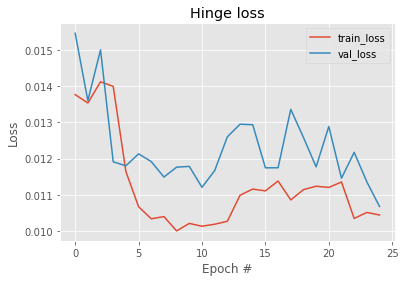

In [35]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Hinge loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


[INFO] saving object detector model...


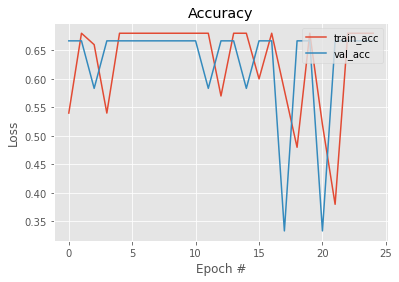

In [36]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


In [66]:
def decile_two (name,pred_y):
    
    #name_dir = name.split('_')[0]
    
    path = 'H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/n02104029/'
    n, boxes = read_content(path+name+'.xml') 
    source_img = load_img(f'H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02104029/'+n+'.JPEG', target_size=input_shape)
    
    img = img_to_array(source_img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img, backend=keras.backend)
    im_name = scoreCAM.prepare_cam(img)
    heatmap = scoreCAM.get_class_heatmap(222)
       
    
    xmin = boxes[0][0]
    ymin = boxes[0][1]
    xmax=boxes[0][2]
    ymax =boxes[0][3]
         
    im1 = heatmap[ymin:ymax, xmin:xmax]
        
    perc = np.percentile(im1, 90)
        
    return 1 - perc

In [47]:
model_new = model
model_new.compile(optimizer='Adam', loss=loss_decile, metrics = ['accuracy'])
H = model_new.fit(trainImages, trainTargets, validation_data=(testImages, testTargets), epochs=25,verbose=1)

Epoch 1/25


TypeError: in user code:

    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)

    TypeError: tf__loss_decile() takes 0 positional arguments but 2 were given


In [87]:
trainImages.shape

(100, 224, 224, 3)

In [88]:
testImages.shape

(12, 224, 224, 3)

array([[[[2.7989235e-03, 2.6912726e-03, 2.5682431e-03],
         [2.8604383e-03, 2.6912726e-03, 2.5990005e-03],
         [2.6758939e-03, 2.3836987e-03, 2.3221839e-03],
         ...,
         [1.6916571e-03, 1.6455210e-03, 1.1687813e-03],
         [8.6120726e-04, 7.9969241e-04, 4.1522493e-04],
         [8.6120726e-04, 7.9969241e-04, 4.1522493e-04]],

        [[2.8604383e-03, 2.7989235e-03, 2.6605153e-03],
         [2.4452135e-03, 2.3375626e-03, 2.2145330e-03],
         [1.7531719e-03, 1.5224913e-03, 1.4455979e-03],
         ...,
         [1.8608228e-03, 1.8146867e-03, 1.3379470e-03],
         [9.8423695e-04, 9.2272204e-04, 5.0749717e-04],
         [9.8423695e-04, 9.2272204e-04, 5.0749717e-04]],

        [[3.0757401e-03, 3.0757401e-03, 2.9219531e-03],
         [1.8608228e-03, 1.8146867e-03, 1.6762784e-03],
         [1.3225683e-03, 1.1534026e-03, 1.0611304e-03],
         ...,
         [2.0607461e-03, 2.0146100e-03, 1.5378700e-03],
         [1.0457517e-03, 9.8423695e-04, 5.6901196e-04],
  

In [48]:
import tensorflow as tf

def percentile(x, p):
    with tf.name_scope('percentile'):
        y = tf.transpose(x)  # take percentile over batch dimension
        sorted_y = tf.sort(y)
        frac_idx = tf.cast(p, tf.float64) / 100. * (tf.cast(tf.shape(y)[-1], tf.float64) - 1.)
        return 0.5 * (  # using midpoint rule
            tf.gather(sorted_y, tf.math.ceil(frac_idx), axis=-1)
            + tf.gather(sorted_y, tf.math.floor(frac_idx), axis=-1))

In [49]:
model_new = model
model_new.compile(optimizer='Adam', loss=percentile, metrics = ['accuracy'])
H = model_new.fit(trainImages, trainTargets, validation_data=(testImages, testTargets), epochs=25,verbose=1)

Epoch 1/25


TypeError: in user code:

    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    <ipython-input-48-2e315a9a8c96>:9 percentile  *
        tf.gather(sorted_y, tf.math.ceil(frac_idx), axis=-1)
    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\array_ops.py:4826 gather_v2
        return gather(
    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\array_ops.py:4808 gather
        return gen_array_ops.gather_v2(
    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\gen_array_ops.py:3799 gather_v2
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\op_def_library.py:628 _apply_op_helper
        _SatisfiesTypeConstraint(base_type,
    D:\Users\aalah_le\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\op_def_library.py:59 _SatisfiesTypeConstraint
        raise TypeError(

    TypeError: Value passed to parameter 'indices' has DataType float64 not in list of allowed values: int32, int64


In [50]:
from keras import metrics

model.compile(loss='mean_squared_error', optimizer='Adam',
              metrics=[metrics.mae,
                       metrics.categorical_accuracy])

In [51]:
H = model_new.fit(trainImages, trainTargets, validation_data=(testImages, testTargets), epochs=25,verbose=1)

Epoch 1/25
4/4 [==============================] - 34s 8s/step - loss: 0.0217 - mean_absolute_error: 0.1107 - categorical_accuracy: 0.6835 - val_loss: 0.0248 - val_mean_absolute_error: 0.1227 - val_categorical_accuracy: 0.6667
Epoch 2/25
4/4 [==============================] - 32s 7s/step - loss: 0.0220 - mean_absolute_error: 0.1092 - categorical_accuracy: 0.6449 - val_loss: 0.0266 - val_mean_absolute_error: 0.1296 - val_categorical_accuracy: 0.6667
Epoch 3/25
4/4 [==============================] - 31s 7s/step - loss: 0.0211 - mean_absolute_error: 0.1117 - categorical_accuracy: 0.7012 - val_loss: 0.0261 - val_mean_absolute_error: 0.1316 - val_categorical_accuracy: 0.6667
Epoch 4/25
4/4 [==============================] - 32s 8s/step - loss: 0.0214 - mean_absolute_error: 0.1112 - categorical_accuracy: 0.6928 - val_loss: 0.0235 - val_mean_absolute_error: 0.1262 - val_categorical_accuracy: 0.6667
Epoch 5/25
4/4 [==============================] - 31s 7s/step - loss: 0.0204 - mean_absolute_err

[INFO] saving object detector model...


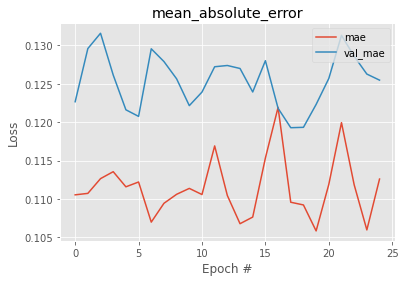

In [53]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["mean_absolute_error"], label="mae")
plt.plot(np.arange(0, N), H.history["val_mean_absolute_error"], label="val_mae")
plt.title("mean_absolute_error")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


[INFO] saving object detector model...


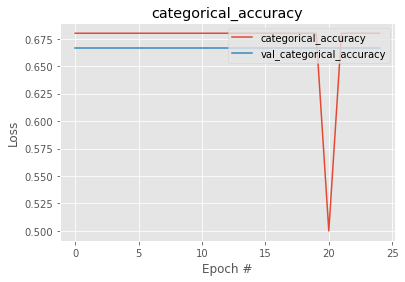

In [54]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["categorical_accuracy"], label="categorical_accuracy")
plt.plot(np.arange(0, N), H.history["val_categorical_accuracy"], label="val_categorical_accuracy")
plt.title("categorical_accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


In [ ]:
from keras import metrics

model.compile(loss='mse', optimizer='adam', 
              metrics=[metrics.mean_squared_error, 
                       metrics.mean_absolute_error, 
                       metrics.mean_absolute_percentage_error,
                       metrics.categorical_accuracy])

In [55]:
keras.metrics.confusion_matrix(testImages, testTargets)

AttributeError: module 'tensorflow.keras.metrics' has no attribute 'confusion_matrix'

In [61]:
def quantile_loss(q, y_p, y):
        e = y_p-y
        return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

In [62]:
model.compile(optimizer='adam', loss=lambda y_p, y: quantile_loss(90, y_p, y))


In [63]:
History = model.fit(trainImages, trainTargets, epochs=20)


Epoch 1/20
4/4 [==============================] - 30s 6s/step - loss: -20.8001
Epoch 2/20
2/4 [==============>...............] - ETA: 17s - loss: -29.3299

KeyboardInterrupt: 

In [72]:
def decile_two (name,pred_y):
    
    #name_dir = name.split('_')[0]
    
     
    n, boxes = read_content('H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/n02104029/*.xml') 
    source_img = load_img(f'H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02104029/*.JPEG', target_size=input_shape)
    
    img = img_to_array(source_img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img, backend=keras.backend)
    im_name = scoreCAM.prepare_cam(img)
    heatmap = scoreCAM.get_class_heatmap(222)
       
    
    xmin = boxes[0][0]
    ymin = boxes[0][1]
    xmax=boxes[0][2]
    ymax =boxes[0][3]
         
    im1 = heatmap[ymin:ymax, xmin:xmax]
        
    perc = np.percentile(im1, 90)
        
    return 1 - perc

In [85]:
from keras import backend as K
def recall_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [86]:
model_new = model
model.compile(optimizer='Adam',loss = decile_two,metrics=['accuracy', f1_score, precision, recall])
#model_new.compile(optimizer='Adam', loss=decile_two)
H = model_new.fit(trainImages, trainTargets, validation_data=(testImages, testTargets), epochs=25,verbose=1)

Epoch 1/25
4/4 [==============================] - 36s 8s/step - loss: 3.1616 - accuracy: 0.3753 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5182 - val_accuracy: 0.3333 - val_f1_score: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/25
4/4 [==============================] - 32s 8s/step - loss: 3.2134 - accuracy: 0.4545 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.9912 - val_accuracy: 0.6667 - val_f1_score: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/25
4/4 [==============================] - 31s 8s/step - loss: 4.4306 - accuracy: 0.6876 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 6.2540 - val_accuracy: 0.3333 - val_f1_score: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/25
4/4 [==============================] - 32s 8s/step - loss: 5.6070 - accuracy: 0.3383 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 7.8786 - val_accuracy: 0.3333 - val_f1_score: 1.00

In [75]:
import listdir
from os.path import isfile, join
files_in_dir = [ f for f in listdir('H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/') if isfile(join('H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/',f)) ]
def decile_two (name,class_id):
    #d = image.flatten()
    # model_input - is an input layer
    for file in files_in_dir:
        with open(file, 'w') as f:
        
    #name_dir = name.split('_')[0]
    
        #path = 'H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/'+name_dir
            n, boxes = read_content(f)
    #for filename in os.listdir(path):
        
        #n, boxes = read_content('H:/imagenet_object_localization_patched2019/ILSVRC/Annotations/CLS-LOC/train/n02104029/*.xml') 
            source_img = load_img(f'H:/imagenet_object_localization_patched2019/ILSVRC/Data/CLS-LOC/train/n02104029/*.JPEG', target_size=input_shape)
    
            img = img_to_array(source_img)
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img, backend=keras.backend)
            im_name = scoreCAM.prepare_cam(img)
            heatmap = scoreCAM.get_class_heatmap(222)
       
    
            xmin = boxes[0][0]
            ymin = boxes[0][1]
            xmax=boxes[0][2]
            ymax =boxes[0][3]
         
            im1 = heatmap[ymin:ymax, xmin:xmax]
        
            perc = np.percentile(im1, 90)
        
            return 1 - perc

ModuleNotFoundError: No module named 'listdir'

In [76]:
!pip install listdir

ERROR: Could not find a version that satisfies the requirement listdir (from versions: none)
ERROR: No matching distribution found for listdir
